## Set up the dependencies

In [1]:
# for reading and validating data
import emeval.input.spec_details as eisd
import emeval.input.phone_view as eipv
import emeval.input.eval_view as eiev

In [2]:
# Visualization helpers
import emeval.viz.phone_view as ezpv
import emeval.viz.eval_view as ezev

In [3]:
# Analytics results
import emeval.metrics.baseline_segmentation as embs

In [4]:
# For plots
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
%matplotlib inline

import IPython.display as ipyd

In [5]:
# For maps
import folium
import branca.element as bre

In [6]:
# For easier debugging while working on modules
import importlib

In [7]:
import pandas as pd
pd.options.display.float_format = '{:.6f}'.format
import arrow
import numpy as np

In [8]:
THIRTY_MINUTES = 30 * 60
TEN_MINUTES = 10 * 60

## The spec

The spec defines what experiments were done, and over which time ranges. Once the experiment is complete, most of the structure is read back from the data, but we use the spec to validate that it all worked correctly. The spec also contains the ground truth for the legs. Here, we read the spec for the trip to UC Berkeley.

In [9]:
DATASTORE_URL = "http://cardshark.cs.berkeley.edu"
AUTHOR_EMAIL = "shankari@eecs.berkeley.edu"
sd_la = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "unimodal_trip_car_bike_mtv_la")
sd_sj = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "car_scooter_brex_san_jose")
sd_ucb = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "train_bus_ebike_mtv_ucb")
sd_ucb_reroute = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "train_bus_ebike_sm_reroute_mtv_ucb")

About to retrieve messages using {'user': 'shankari@eecs.berkeley.edu', 'key_list': ['config/evaluation_spec'], 'start_time': 0, 'end_time': 1569444460}
response = <Response [200]>
Found 14 entries
After iterating over 14 entries, entry found
Found spec = Round trip car and bike trip in the South Bay
Evaluation ran from 2019-07-20T00:00:00-07:00 -> 2019-09-30T00:00:00-07:00
About to retrieve messages using {'user': 'shankari@eecs.berkeley.edu', 'key_list': ['config/evaluation_spec'], 'start_time': 0, 'end_time': 1569444461}
response = <Response [200]>
Found 14 entries
After iterating over 14 entries, entry found
Found spec = Multi-modal car scooter BREX trip to San Jose
Evaluation ran from 2019-07-20T00:00:00-07:00 -> 2019-09-30T00:00:00-07:00
About to retrieve messages using {'user': 'shankari@eecs.berkeley.edu', 'key_list': ['config/evaluation_spec'], 'start_time': 0, 'end_time': 1569444462}
response = <Response [200]>
Found 14 entries
After iterating over 14 entries, entry found
Fou

## The views

There are two main views for the data - the phone view and the evaluation view. 

### Phone view

In the phone view, the phone is primary, and then there is a tree that you can traverse to get the data that you want. Traversing that tree typically involves nested for loops; here's an example of loading the phone view and traversing it. You can replace the print statements with real code. When you are ready to check this in, please move the function to one of the python modules so that we can invoke it more generally

In [10]:
importlib.reload(eipv)

<module 'emeval.input.phone_view' from '/Users/shankari/e-mission/e-mission-eval-public-data/emeval/input/phone_view.py'>

In [11]:
pv_la = eipv.PhoneView(sd_la)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/

response = <Response [200]>
Found 7 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564334117.295, 'end_time': 1564343045.9}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564351305.633, 'end_time': 1564360156.392}
response = <Response [200]>
Found 9 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1565571034.93, 'end_time': 1565579009.992}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1567271203.764, 'end_time': 1567279427.961}
response = <Response [200]>
Found 9 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1567288614.642, 'end_time': 1567297340.9

response = <Response [200]>
Found 30 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1564274276.021558, 'end_time': 1564282332.15351}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1564334069.1049929, 'end_time': 1564343007.721693}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1564351193.2504249, 'end_time': 1564360033.887364}
response = <Response [200]>
Found 12 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1565570989.744656, 'end_time': 1565578915.798939}
response = <Response [200]>
Found 13 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1567271164.779111, 'end_time'

response = <Response [200]>
Found 1868 entries
Retrieved 1868 entries with timestamps [1564274558.354, 1564274558.727, 1564274564.028, 1564274565, 1564274566, 1564274567, 1564274568, 1564274569, 1564274570, 1564274571]...
About to retrieve data for ucb-sdb-android-2 from 1564280671.731 -> 1564282402.886
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1564280671.731, 'end_time': 1564282402.886}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564280652]...
About to retrieve data for ucb-sdb-android-2 from 1564274304.968 -> 1564282402.886
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1564274304.968, 'end_time': 1564282402.886}
response = <Response [200]>
Found 1854 entries
Retrieved 1854 entries with timestamps [1564274558.727, 1564274565, 1564274566, 1564274567, 1564274568, 1564274569, 1564274570, 1564274571, 1564

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567296305.357]...
About to retrieve data for ucb-sdb-android-2 from 1567288623.391 -> 1567297357.197
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1567288623.391, 'end_time': 1567297357.197}
response = <Response [200]>
Found 2121 entries
Retrieved 2121 entries with timestamps [1567288912, 1567288913, 1567288914, 1567288915, 1567288916, 1567288917, 1567288918, 1567288919, 1567288920, 1567288921]...
About to retrieve data for ucb-sdb-android-2 from 1567296306.499 -> 1567297357.197
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1567296306.499, 'end_time': 1567297357.197}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567296305.357]...
About to retrieve data for ucb-sdb-android-3 from 1564274288.319 -> 1564282423.072
About t

response = <Response [200]>
Found 2159 entries
Retrieved 2159 entries with timestamps [1567271523.331, 1567271525, 1567271526, 1567271527, 1567271528, 1567271529, 1567271530, 1567271531, 1567271532, 1567271533]...
About to retrieve data for ucb-sdb-android-3 from 1567278441.249 -> 1567279372.922
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/filtered_location'], 'start_time': 1567278441.249, 'end_time': 1567279372.922}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567278439.914]...
About to retrieve data for ucb-sdb-android-3 from 1567288638.503 -> 1567297394.837
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1567288638.503, 'end_time': 1567297394.837}
response = <Response [200]>
Found 2142 entries
Retrieved 2142 entries with timestamps [1567288849, 1567288908.399, 1567288910, 1567288911, 1567288912, 1567288913, 1567288914, 1567288915, 15672889

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564342965.9946914]...
About to retrieve data for ucb-sdb-ios-1 from 1564333996.5363011 -> 1564342975.472409
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/filtered_location'], 'start_time': 1564333996.5363011, 'end_time': 1564342975.472409}
response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
About to retrieve data for ucb-sdb-ios-1 from 1564351246.07085 -> 1564359997.0496612
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/location'], 'start_time': 1564351246.07085, 'end_time': 1564359997.0496612}
response = <Response [200]>
Found 2214 entries
Retrieved 2214 entries with timestamps [1564351245.890137, 1564351251.02554, 1564351252.0238216, 1564351253.022198, 1564351254.0206494, 1564351255.0192485, 1564351257.0167162, 1564351258.0155365, 1564351259.0144756, 1564351261.0124218]...
About to retrieve data 

response = <Response [200]>
Found 1409 entries
Retrieved 1409 entries with timestamps [1564334605.343677, 1564334605.35634, 1564334608.9970002, 1564334609.9970446, 1564334610.9972146, 1564334611.9973783, 1564334612.9975357, 1564334613.9976838, 1564334614.9978194, 1564334615.9979572]...
About to retrieve data for ucb-sdb-ios-2 from 1564341004.17783 -> 1564342987.826695
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1564341004.17783, 'end_time': 1564342987.826695}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564341003.9938674]...
About to retrieve data for ucb-sdb-ios-2 from 1564351227.1936831 -> 1564360024.574613
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/location'], 'start_time': 1564351227.1936831, 'end_time': 1564360024.574613}
response = <Response [200]>
Found 1479 entries
Retrieved 1479 entries with timestamps [1564351652.800541, 1564

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564280497.4278622]...
About to retrieve data for ucb-sdb-ios-3 from 1564274265.212364 -> 1564282322.549677
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/filtered_location'], 'start_time': 1564274265.212364, 'end_time': 1564282322.549677}
response = <Response [200]>
Found 164 entries
Retrieved 164 entries with timestamps [1564275493.428633, 1564275493.9934778, 1564275496.6995292, 1564275496.7031121, 1564279476.508539, 1564279477.556017, 1564279477.5692558, 1564279483.804306, 1564279491.801554, 1564279498.237344]...
About to retrieve data for ucb-sdb-ios-3 from 1564280497.5318642 -> 1564282322.549677
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/filtered_location'], 'start_time': 1564280497.5318642, 'end_time': 1564282322.549677}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564280497.4278622]...


response = <Response [200]>
Found 191 entries
Retrieved 191 entries with timestamps [1567288966.799432, 1567288970.999717, 1567288972.999673, 1567289002.9989781, 1567289006.998827, 1567289010.9986677, 1567289018.9983454, 1567289022.998178, 1567289026.9980106, 1567289035.9976294]...
About to retrieve data for ucb-sdb-ios-3 from 1567295578.123241 -> 1567297316.01469
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1567295578.123241, 'end_time': 1567297316.01469}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567295578.057469]...
About to retrieve data for ucb-sdb-ios-3 from 1567288581.6808891 -> 1567297316.01469
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/filtered_location'], 'start_time': 1567288581.6808891, 'end_time': 1567297316.01469}
response = <Response [200]>
Found 177 entries
Retrieved 177 entries with timestamps [1567288970.999717, 1567288972.99

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564360156.019]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-1 from 1565571034.93 -> 1565579009.992
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1565571034.93, 'end_time': 1565579009.992}
response = <Response [200]>
Found 696 entries
Retrieved 696 entries with timestamps [1565571047.229, 1565571047.265, 1565571060.105, 1565571073.261, 1565571086.122, 1565571098.288, 1565571110.936, 1565571124.113, 1565571136.955, 1565571149.982]...
About to retrieve data for ucb-sdb-android-1 from 1565579001.09 -> 1565579009.992
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1565579001.09, 'end_time': 1565579009.992}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565579001.09]..

response = <Response [200]>
Found 87 entries
Retrieved 87 entries with timestamps [1564274799.255, 1564274844.391, 1564274876.142, 1564274908.298, 1564274939.241, 1564274972.776, 1564275004.816, 1564275036.774, 1564275054.166, 1564275085.157]...
About to retrieve data for ucb-sdb-android-3 from 1564280654.09 -> 1564282423.072
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1564280654.09, 'end_time': 1564282423.072}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564280654.09]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-3 from 1564334097.33 -> 1564343025.406
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1564334097.33, 'end_time': 1564343025.406}
response = <Response [200]>
Found 88 entries
Retrieved 88 entries with timestamps [1564334508.801, 1

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567279346.569]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-4 from 1567288647.374 -> 1567297374.928
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['background/motion_activity'], 'start_time': 1567288647.374, 'end_time': 1567297374.928}
response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
motion activity has not been processed, copying write_ts -> ts
Processing data for ios phones
About to retrieve data for ucb-sdb-ios-1 from 1564274247.275763 -> 1564282290.729272
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/motion_activity'], 'start_time': 1564274247.275763, 'end_time': 1564282290.729272}
response = <Response [200]>
Found 517 entries
Retrieved 517 entries with timestamps [1564274270.7468784, 1564274273.2592103, 1564274323.4081597, 1564274353.5

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564359604.1259458]...
About to retrieve data for ucb-sdb-ios-2 from 1565570980.468295 -> 1565578894.831118
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1565570980.468295, 'end_time': 1565578894.831118}
response = <Response [200]>
Found 287 entries
Retrieved 287 entries with timestamps [1565570996.1814125, 1565571071.1814132, 1565571081.181413, 1565571086.1814132, 1565571176.1814127, 1565571186.1814127, 1565571191.1814127, 1565571196.1814127, 1565571216.1814125, 1565571246.1814132]...
About to retrieve data for ucb-sdb-ios-2 from 1565578879.3066506 -> 1565578894.831118
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1565578879.3066506, 'end_time': 1565578894.831118}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565578879.3066506]...

response = <Response [200]>
Found 243 entries
Retrieved 243 entries with timestamps [1564274288.6357331, 1564274293.6357331, 1564274343.6357334, 1564274438.6357336, 1564274568.6357331, 1564274603.6357336, 1564274673.6357334, 1564274758.684916, 1564274797.4722486, 1564274835.013862]...
About to retrieve data for ucb-sdb-ios-4 from 1564282332.075515 -> 1564282332.15351
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1564282332.075515, 'end_time': 1564282332.15351}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564282332.075515]...
About to retrieve data for ucb-sdb-ios-4 from 1564334069.1049929 -> 1564343007.721693
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1564334069.1049929, 'end_time': 1564343007.721693}
response = <Response [200]>
Found 192 entries
Retrieved 192 entries with timestamps [1564334156.9572866, 15

response = <Response [200]>
Found 6 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1564274288.319, 'end_time': 1564282423.072}
response = <Response [200]>
Found 8 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1564334097.33, 'end_time': 1564343025.406}
response = <Response [200]>
Found 12 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1564351277.477, 'end_time': 1564360134.181}
response = <Response [200]>
Found 6 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition']

response = <Response [200]>
Found 8 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1564334069.1049929, 'end_time': 1564343007.721693}
response = <Response [200]>
Found 8 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1564351193.2504249, 'end_time': 1564360033.887364}
response = <Response [200]>
Found 10 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1565570989.744656, 'end_time': 1565578915.798939}
response = <Response [200]>
Found 10 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transi

In [12]:
pv_sj = eipv.PhoneView(sd_sj)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/

response = <Response [200]>
Found 9 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1563896743.139, 'end_time': 1563917431.489}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564244087.215, 'end_time': 1564263878.59}
response = <Response [200]>
Found 10 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1565026006.793, 'end_time': 1565050217.383}
response = <Response [200]>
Found 12 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1565116007.631, 'end_time': 1565140213.84}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1565194658.17, 'end_time': 1565217816

response = <Response [200]>
Found 43 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1563821424.2870421, 'end_time': 1563846221.430156}
response = <Response [200]>
Found 20 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1563896726.293744, 'end_time': 1563917689.911433}
response = <Response [200]>
Found 15 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1564244069.2081819, 'end_time': 1564263869.479578}
response = <Response [200]>
Found 16 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1565025999.709025, 'end_time': 1565050202.3005052}
response = <Response [200]>
Found 20 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1565115979.7075438, 'end_ti

response = <Response [200]>
Found 7073 entries
Retrieved 7073 entries with timestamps [1563821666.739, 1563821668.84, 1563821671.404, 1563821673, 1563821674, 1563821675, 1563821676, 1563821677, 1563821678, 1563821679]...
About to retrieve data for ucb-sdb-android-2 from 1563846294.501 -> 1563846294.773
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1563846294.501, 'end_time': 1563846294.773}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563843196]...
About to retrieve data for ucb-sdb-android-2 from 1563821451.365 -> 1563846294.773
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1563821451.365, 'end_time': 1563846294.773}
response = <Response [200]>
Found 7067 entries
Retrieved 7067 entries with timestamps [1563821668.84, 1563821671.404, 1563821673, 1563821674, 1563821675, 1563821676, 1563821677, 1563821678, 15

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565216017.932]...
About to retrieve data for ucb-sdb-android-2 from 1565194646.726 -> 1565217853.529
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1565194646.726, 'end_time': 1565217853.529}
response = <Response [200]>
Found 7218 entries
Retrieved 7218 entries with timestamps [1565194907.112, 1565194913, 1565194914, 1565194915, 1565194916, 1565194917, 1565194918, 1565194919, 1565194920, 1565194921]...
About to retrieve data for ucb-sdb-android-2 from 1565217852.659 -> 1565217853.529
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1565217852.659, 'end_time': 1565217853.529}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565216012.932]...
About to retrieve data for ucb-sdb-android-3 from 1563821466.019 -> 1563846343.356
Abo

response = <Response [200]>
Found 6079 entries
Retrieved 6079 entries with timestamps [1565116058.369, 1565116062.181, 1565116067.966, 1565116075.631, 1565116080.689, 1565116087.501, 1565116096.527, 1565116105.79, 1565116113.564, 1565116118.668]...
About to retrieve data for ucb-sdb-android-3 from 1565140277.976 -> 1565140296.074
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/filtered_location'], 'start_time': 1565140277.976, 'end_time': 1565140296.074}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565140279]...
About to retrieve data for ucb-sdb-android-3 from 1565194636.421 -> 1565217890.224
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1565194636.421, 'end_time': 1565217890.224}
response = <Response [200]>
Found 5253 entries
Retrieved 5253 entries with timestamps [1565194898.051, 1565194898.051, 1565194904.934, 1565194909.939, 1565194917.03

response = <Response [200]>
Found 5722 entries
Retrieved 5722 entries with timestamps [1563896678.561882, 1563896681.53107, 1563896682.0100274, 1563896683.009514, 1563896684.0088549, 1563896687.0071504, 1563896688.006662, 1563896690.0057957, 1563896691.0053968, 1563896692.0050101]...
About to retrieve data for ucb-sdb-ios-1 from 1563917428.5349998 -> 1563917566.5567281
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/location'], 'start_time': 1563917428.5349998, 'end_time': 1563917566.5567281}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563917428.450831]...
About to retrieve data for ucb-sdb-ios-1 from 1563896678.241638 -> 1563917566.5567281
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/filtered_location'], 'start_time': 1563896678.241638, 'end_time': 1563917566.5567281}
response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
About to retrieve dat

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563915825.4298968]...
About to retrieve data for ucb-sdb-ios-2 from 1563896695.465279 -> 1563917644.283163
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1563896695.465279, 'end_time': 1563917644.283163}
response = <Response [200]>
Found 4214 entries
Retrieved 4214 entries with timestamps [1563897071.5372581, 1563897071.539604, 1563897077.92377, 1563897085.836732, 1563897085.9985485, 1563897086.9985986, 1563897091.99877, 1563897092.9987903, 1563897093.998808, 1563897094.9988203]...
About to retrieve data for ucb-sdb-ios-2 from 1563915825.6501431 -> 1563917644.283163
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1563915825.6501431, 'end_time': 1563917644.283163}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563915825.4298968]...

response = <Response [200]>
Found 1021 entries
Retrieved 1021 entries with timestamps [1563821693.67274, 1563821694.628164, 1563821694.6408582, 1563821701.492943, 1563821707.916102, 1563821714.441504, 1563821720.929595, 1563821727.351037, 1563821733.773116, 1563821740.1933188]...
About to retrieve data for ucb-sdb-ios-3 from 1563842661.888513 -> 1563846186.997916
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1563842661.888513, 'end_time': 1563846186.997916}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563842661.7784162]...
About to retrieve data for ucb-sdb-ios-3 from 1563821405.729749 -> 1563846186.997916
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/filtered_location'], 'start_time': 1563821405.729749, 'end_time': 1563846186.997916}
response = <Response [200]>
Found 682 entries
Retrieved 682 entries with timestamps [1563821694.6408582, 1563821701.

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565140175.999116]...
About to retrieve data for ucb-sdb-ios-3 from 1565194722.424724 -> 1565217784.212751
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1565194722.424724, 'end_time': 1565217784.212751}
response = <Response [200]>
Found 971 entries
Retrieved 971 entries with timestamps [1565194974.483992, 1565195385.244978, 1565195388.503786, 1565195390.6859698, 1565195393.0103195, 1565195394.009594, 1565195395.0088694, 1565195397.007664, 1565195399.0066142, 1565195401.0057068]...
About to retrieve data for ucb-sdb-ios-3 from 1565214712.10034 -> 1565217784.212751
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1565214712.10034, 'end_time': 1565217784.212751}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565214711.9975872]...
About to retrieve data

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564263875.826]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-1 from 1565026006.793 -> 1565050217.383
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1565026006.793, 'end_time': 1565050217.383}
response = <Response [200]>
Found 733 entries
Retrieved 733 entries with timestamps [1565026007.617, 1565026007.643, 1565026019.694, 1565026019.727, 1565026032.668, 1565026045.749, 1565026058.634, 1565026071.786, 1565026084.795, 1565026098.289]...
About to retrieve data for ucb-sdb-android-1 from 1565050204.65 -> 1565050217.383
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1565050204.65, 'end_time': 1565050217.383}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565050204.65]

response = <Response [200]>
Found 231 entries
Retrieved 231 entries with timestamps [1563821738.499, 1563821779.842, 1563821837.62, 1563821842.841, 1563821877.531, 1563821908.583, 1563821930.869, 1563821962.319, 1563821994.516, 1563822047.615]...
About to retrieve data for ucb-sdb-android-3 from 1563842914.109 -> 1563846343.356
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1563842914.109, 'end_time': 1563846343.356}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563842914.109]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-3 from 1563896782.972 -> 1563917505.1820002
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1563896782.972, 'end_time': 1563917505.1820002}
response = <Response [200]>
Found 233 entries
Retrieved 233 entries with timestamps [1

response = <Response [200]>
Found 900 entries
Retrieved 900 entries with timestamps [1563821395.9146056, 1563821405.3125677, 1563821405.6250775, 1563821501.322351, 1563821503.8291569, 1563821656.8780947, 1563821699.5039434, 1563821704.5208488, 1563821714.5498688, 1563821739.6214435]...
About to retrieve data for ucb-sdb-ios-1 from 1563846085.4912872 -> 1563846150.16837
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/motion_activity'], 'start_time': 1563846085.4912872, 'end_time': 1563846150.16837}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563846085.4912872]...
About to retrieve data for ucb-sdb-ios-1 from 1563896678.241638 -> 1563917566.5567281
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/motion_activity'], 'start_time': 1563896678.241638, 'end_time': 1563917566.5567281}
response = <Response [200]>
Found 543 entries
Retrieved 543 entries with timestamps [1563896727.012053,

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565050092.7069602]...
About to retrieve data for ucb-sdb-ios-2 from 1565115934.904733 -> 1565140080.093207
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1565115934.904733, 'end_time': 1565140080.093207}
response = <Response [200]>
Found 444 entries
Retrieved 444 entries with timestamps [1565115942.1383767, 1565115944.637134, 1565115988.9834712, 1565116098.9834712, 1565116103.9834714, 1565116176.9178183, 1565116181.917818, 1565116231.917819, 1565116426.917818, 1565116431.9178183]...
About to retrieve data for ucb-sdb-ios-2 from 1565140011.1331575 -> 1565140080.093207
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1565140011.1331575, 'end_time': 1565140080.093207}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565140011.1331575]...
Ab

response = <Response [200]>
Found 255 entries
Retrieved 255 entries with timestamps [1563896733.0620825, 1563896750.5781207, 1563896760.5781207, 1563896795.5781212, 1563896815.5781212, 1563896875.5781207, 1563896890.5781207, 1563896910.5781202, 1563896930.5781205, 1563896935.5781207]...
About to retrieve data for ucb-sdb-ios-4 from 1563916932.9843733 -> 1563917689.911433
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1563916932.9843733, 'end_time': 1563917689.911433}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563916932.9843733]...
About to retrieve data for ucb-sdb-ios-4 from 1564244069.2081819 -> 1564263869.479578
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1564244069.2081819, 'end_time': 1564263869.479578}
response = <Response [200]>
Found 388 entries
Retrieved 388 entries with timestamps [1564244070.7108

response = <Response [200]>
Found 7 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1565026028.417, 'end_time': 1565050275.592}
response = <Response [200]>
Found 7 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1565116061.463, 'end_time': 1565140296.074}
response = <Response [200]>
Found 8 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1565194636.421, 'end_time': 1565217890.224}
response = <Response [200]>
Found 5 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['statemachine/transition']

response = <Response [200]>
Found 18 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1565115979.7075438, 'end_time': 1565140156.261787}
response = <Response [200]>
Found 18 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1565194696.183675, 'end_time': 1565217805.7350268}
response = <Response [200]>
Found 16 entries
transition has not been processed, creating ts -> fmt_time
-------------------- About to select trip specific ranges --------------------
Filling label ucb-sdb-android-1 for OS android
Filling label ucb-sdb-android-2 for OS android
Filling label ucb-sdb-android-3 for OS android
Filling label ucb-sdb-android-4 for OS android
Filling label ucb-sdb-ios-1 for OS ios
Filling label ucb-sdb-ios-2 for OS ios
Filling label

In [13]:
pv_ucb = eipv.PhoneView(sd_ucb)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563260400, 'end_time': 1567148400}
response = <Response [200]>
Found 72 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563260400, 'end_time': 1567148400}
response = <Response [200]>
Found 60 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563260400, 'end_time': 1567148400}
response = <Response [200]>
Found 60 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/

response = <Response [200]>
Found 24 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564067115.279, 'end_time': 1564111993.08}
response = <Response [200]>
Found 20 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564153794.979, 'end_time': 1564198662.867}
response = <Response [200]>
Found 22 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1563979684.205, 'end_time': 1564026016.571}
response = <Response [200]>
Found 37 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1564067129.194, 'end_time': 1564111993.08}
response = <Response [200]>
Found 30 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1564153809.884, 'end_time': 15641986

response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
About to retrieve data for ucb-sdb-android-2 from 1563979684.205 -> 1564026016.571
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1563979684.205, 'end_time': 1564026016.571}
response = <Response [200]>
Found 14149 entries
Retrieved 14149 entries with timestamps [1563979683.523, 1563979683.523, 1563979686.541, 1563979691, 1563979692, 1563979693, 1563979694, 1563979695, 1563979696, 1563979697]...
About to retrieve data for ucb-sdb-android-2 from 1564021868.503 -> 1564026016.571
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1564021868.503, 'end_time': 1564026016.571}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564021794]...
About to retrieve data for ucb-sdb-android-2 from 1563979684.205 -> 1564026016.571
About to retrieve messages us

response = <Response [200]>
Found 875 entries
Retrieved 875 entries with timestamps [1564154023.987, 1564154023.987, 1564154050, 1564154055, 1564154088.096, 1564154119.23, 1564154150, 1564154180, 1564154211, 1564154241]...
About to retrieve data for ucb-sdb-android-3 from 1564196589.192 -> 1564198700.606
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1564196589.192, 'end_time': 1564198700.606}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564196587.808]...
About to retrieve data for ucb-sdb-android-3 from 1564153836.582 -> 1564198700.606
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/filtered_location'], 'start_time': 1564153836.582, 'end_time': 1564198700.606}
response = <Response [200]>
Found 721 entries
Retrieved 721 entries with timestamps [1564154023.987, 1564154050, 1564154055, 1564154088.096, 1564154119.23, 1564154150, 1564154180, 156415

response = <Response [200]>
Found 11052 entries
Retrieved 11052 entries with timestamps [1563980042.8723888, 1563980044.385489, 1563980046.1162372, 1563980047.1293101, 1563980047.999834, 1563980048.9998174, 1563980049.9998074, 1563980050.9997978, 1563980051.9997861, 1563980053.999772]...
About to retrieve data for ucb-sdb-ios-2 from 1564023575.128773 -> 1564026158.946105
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/location'], 'start_time': 1564023575.128773, 'end_time': 1564026158.946105}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564023574.9863236]...
About to retrieve data for ucb-sdb-ios-2 from 1563979628.6823301 -> 1564026158.946105
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1563979628.6823301, 'end_time': 1564026158.946105}
response = <Response [200]>
Found 10525 entries
Retrieved 10525 entries with timestamps [1563980044.385489

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564109946.124861]...
About to retrieve data for ucb-sdb-ios-3 from 1564153754.09529 -> 1564198601.973415
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1564153754.09529, 'end_time': 1564198601.973415}
response = <Response [200]>
Found 2321 entries
Retrieved 2321 entries with timestamps [1564117209.9645019, 1564154572.964088, 1564154849.341601, 1564155206.677164, 1564155222.038831, 1564155229.005299, 1564155244.811119, 1564155251.220082, 1564155273.199754, 1564155282.301773]...
About to retrieve data for ucb-sdb-ios-3 from 1564198595.263564 -> 1564198601.973415
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1564198595.263564, 'end_time': 1564198601.973415}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564198595.1684551]...
About to retrieve data f

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564107892.911]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-2 from 1564153809.884 -> 1564198662.867
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/motion_activity'], 'start_time': 1564153809.884, 'end_time': 1564198662.867}
response = <Response [200]>
Found 1587 entries
Retrieved 1587 entries with timestamps [1564154036.632, 1564154049, 1564154057.113, 1564154065.3, 1564154078.39, 1564154091.102, 1564154103.719, 1564154116.522, 1564154125.219, 1564154134.269]...
About to retrieve data for ucb-sdb-android-2 from 1564193889.939 -> 1564198662.867
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/motion_activity'], 'start_time': 1564193889.939, 'end_time': 1564198662.867}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564193889.939]..

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564198468.2332456]...
About to retrieve data for ucb-sdb-ios-2 from 1563979628.6823301 -> 1564026158.946105
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1563979628.6823301, 'end_time': 1564026158.946105}
response = <Response [200]>
Found 927 entries
Retrieved 927 entries with timestamps [1563979677.622645, 1563979767.6226444, 1563979772.6226444, 1563979787.6226444, 1563980990.0595727, 1563980993.8012114, 1563981015.9809394, 1563981085.6387854, 1563981089.7018366, 1563981093.760253]...
About to retrieve data for ucb-sdb-ios-2 from 1564026145.1770449 -> 1564026158.946105
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1564026145.1770449, 'end_time': 1564026158.946105}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564026145.1770449]..

response = <Response [200]>
Found 2 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['statemachine/transition'], 'start_time': 1564067115.279, 'end_time': 1564111993.08}
response = <Response [200]>
Found 2 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['statemachine/transition'], 'start_time': 1564153794.979, 'end_time': 1564198662.867}
response = <Response [200]>
Found 2 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['statemachine/transition'], 'start_time': 1563979684.205, 'end_time': 1564026016.571}
response = <Response [200]>
Found 21 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['statemachine/transition']

In [14]:
pv_ucb_reroute = eipv.PhoneView(sd_ucb_reroute)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1567321200, 'end_time': 1569826800}
response = <Response [200]>
Found 8 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1567321200, 'end_time': 1569826800}
response = <Response [200]>
Found 8 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1567321200, 'end_time': 1569826800}
response = <Response [200]>
Found 8 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/eva

response = <Response [200]>
Found 21 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1568214664.759, 'end_time': 1568259367.23}
response = <Response [200]>
Found 21 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1568732827.102, 'end_time': 1568775432.33}
response = <Response [200]>
Found 19 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1568128292.816, 'end_time': 1568171423.307}
response = <Response [200]>
Found 32 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1568214683.663, 'end_time': 1568259367.23}
response = <Response [200]>
Found 25 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1568732838.865, 'end_time': 156877545

response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
About to retrieve data for ucb-sdb-android-2 from 1568128292.816 -> 1568171423.307
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1568128292.816, 'end_time': 1568171423.307}
response = <Response [200]>
Found 12323 entries
Retrieved 12323 entries with timestamps [1568128293.495, 1568128293.495, 1568128295.417, 1568128300.537, 1568128305.58, 1568128310.629, 1568128315.679, 1568128320.785, 1568128325.84, 1568128330.889]...
About to retrieve data for ucb-sdb-android-2 from 1568169577.077 -> 1568171423.307
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1568169577.077, 'end_time': 1568171423.307}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568169576.259]...
About to retrieve data for ucb-sdb-android-2 from 1568128292.816 -> 1568171423.307

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568259381]...
About to retrieve data for ucb-sdb-android-3 from 1568732848.143 -> 1568775473.326
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1568732848.143, 'end_time': 1568775473.326}
response = <Response [200]>
Found 6930 entries
Retrieved 6930 entries with timestamps [1568732847.721, 1568732847.721, 1568732849.254, 1568732860.245, 1568732868.085, 1568732873.249, 1568732878.288, 1568732883.355, 1568732888.395, 1568732896.124]...
About to retrieve data for ucb-sdb-android-3 from 1568775472.624 -> 1568775473.326
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1568775472.624, 'end_time': 1568775473.326}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568775472.141]...
About to retrieve data for ucb-sdb-android-3 from 1568732848.143 -> 1568

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568171383.9980478]...
About to retrieve data for ucb-sdb-ios-2 from 1568128234.2934499 -> 1568171406.342128
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1568128234.2934499, 'end_time': 1568171406.342128}
response = <Response [200]>
Found 7926 entries
Retrieved 7926 entries with timestamps [1568128608.704241, 1568128608.704241, 1568128611.3965454, 1568128613.00422, 1568128614.0039368, 1568128615.0036702, 1568128617.0031762, 1568128618.0029507, 1568128619.00274, 1568128620.002542]...
About to retrieve data for ucb-sdb-ios-2 from 1568171384.342057 -> 1568171406.342128
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1568171384.342057, 'end_time': 1568171406.342128}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568171383.9980478]...

response = <Response [200]>
Found 3120 entries
Retrieved 3120 entries with timestamps [1568733090.4660358, 1568733231.789537, 1568733236.933502, 1568733240.0436425, 1568733266.0061285, 1568733287.998708, 1568733306.9964137, 1568733326.9950864, 1568733352.9937966, 1568733374.992795]...
About to retrieve data for ucb-sdb-ios-3 from 1568775392.084474 -> 1568775397.909452
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1568775392.084474, 'end_time': 1568775397.909452}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568775391.9997694]...
About to retrieve data for ucb-sdb-ios-3 from 1568732800.530198 -> 1568775397.909452
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/filtered_location'], 'start_time': 1568732800.530198, 'end_time': 1568775397.909452}
response = <Response [200]>
Found 2792 entries
Retrieved 2792 entries with timestamps [1568733231.789537, 15687

response = <Response [200]>
Found 1486 entries
Retrieved 1486 entries with timestamps [1568733033.138, 1568733046.84, 1568733062.798, 1568733079.658, 1568733089.731, 1568733099.868, 1568733116.628, 1568733128.374, 1568733144.145, 1568733160.971]...
About to retrieve data for ucb-sdb-android-2 from 1568773380.898 -> 1568775451.963
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/motion_activity'], 'start_time': 1568773380.898, 'end_time': 1568775451.963}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568773380.898]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-3 from 1568128304.271 -> 1568171480.428
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1568128304.271, 'end_time': 1568171480.428}
response = <Response [200]>
Found 1994 entries
Retrieved 1994 entries with timestamps [15681

response = <Response [200]>
Found 640 entries
Retrieved 640 entries with timestamps [1568214668.6757827, 1568214748.675783, 1568215663.8944585, 1568215673.8944583, 1568215688.8944592, 1568215693.8944592, 1568215808.8944588, 1568215975.12434, 1568215992.6017208, 1568216148.9740565]...
About to retrieve data for ucb-sdb-ios-2 from 1568259292.0169773 -> 1568259320.4247599
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1568259292.0169773, 'end_time': 1568259320.4247599}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568259292.0169773]...
About to retrieve data for ucb-sdb-ios-2 from 1568732781.243727 -> 1568775365.402838
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1568732781.243727, 'end_time': 1568775365.402838}
response = <Response [200]>
Found 760 entries
Retrieved 760 entries with timestamps [1568732783.287293,

response = <Response [200]>
Found 11 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['statemachine/transition'], 'start_time': 1568732838.865, 'end_time': 1568775451.963}
response = <Response [200]>
Found 20 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1568128304.271, 'end_time': 1568171480.428}
response = <Response [200]>
Found 8 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1568214696.732, 'end_time': 1568259402.365}
response = <Response [200]>
Found 7 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition

In [15]:
import emeval.analysed.phone_view as eapv

In [16]:
av_la = eapv.create_analysed_view(pv_la, "http://localhost:8080", "analysis/recreated_location", "analysis/cleaned_trip", "analysis/inferred_section")
av_sj = eapv.create_analysed_view(pv_sj, "http://localhost:8080", "analysis/recreated_location", "analysis/cleaned_trip", "analysis/inferred_section")
av_ucb = eapv.create_analysed_view(pv_ucb, "http://localhost:8080", "analysis/recreated_location", "analysis/cleaned_trip", "analysis/inferred_section")
av_ucb_reroute = eapv.create_analysed_view(pv_ucb_reroute, "http://localhost:8080", "analysis/recreated_location", "analysis/cleaned_trip", "analysis/inferred_section")

Finished copying unimodal_trip_car_bike_mtv_la, starting overwrite
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
android dict_keys(['ucb-sdb-android-1', 'ucb-sdb-android-2', 'ucb-sdb-android-3', 'ucb-sdb-android-4'])
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-1 accuracy_control dict_keys(['role', 'transitions', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges'])
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/recreated_location'], 'start_time': 1563606000, 'end_time': 1569445191}
response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569445191}
response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/inferred_section'], 'start_time': 1563606000, 'end_time': 1569445191}
response = <Response [200]>
Found 0 e

response = <Response [200]>
Found 5581 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569445196}
response = <Response [200]>
Found 78 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/inferred_section'], 'start_time': 1563606000, 'end_time': 1569445196}
response = <Response [200]>
Found 161 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s HAMFDC:HAMFDC_0 HAHFDC v/s HAMFDC HAMFDC_0 2
Before filtering, trips = [('2019-07-22T11:55:16.121000-07:00', '2019-07-22T12:22:51-07:0

response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569445197}
response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['analysis/inferred_section'], 'start_time': 1563606000, 'end_time': 1569445197}
response = <Response [200]>
Found 0 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         fixed:ACCURACY_CONTROL_0 HAHFDC v/s MAHFDC accuracy_control_0 2
Before filtering, trips = []
Filter range = 2019-07-27T17:37:27.275763-07:00 -> 2019-07-27T19:5

response = <Response [200]>
Found 5638 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569445202}
response = <Response [200]>
Found 50 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/inferred_section'], 'start_time': 1563606000, 'end_time': 1569445202}
response = <Response [200]>
Found 134 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:MAHFDC_0 HAHFDC v/s MAHFDC MAHFDC_0 2
Before filtering, trips = [('2019-07-22T11:54:54.640858-07:00', '2019-07-22T12:12:05.875441-07:00

Finished copying car_scooter_brex_san_jose, starting overwrite
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
android dict_keys(['ucb-sdb-android-1', 'ucb-sdb-android-2', 'ucb-sdb-android-3', 'ucb-sdb-android-4'])
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-1 accuracy_control dict_keys(['role', 'transitions', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges'])
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/recreated_location'], 'start_time': 1563606000, 'end_time': 1569445218}
response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569445218}
response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/inferred_section'], 'start_time': 1563606000, 'end_time': 1569445218}
response = <Response [200]>
Found 0 entri

response = <Response [200]>
Found 5581 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569445224}
response = <Response [200]>
Found 78 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/inferred_section'], 'start_time': 1563606000, 'end_time': 1569445224}
response = <Response [200]>
Found 161 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s HAMFDC:HAMFDC_0 HAHFDC v/s HAMFDC HAMFDC_0 2
Before filtering, trips = [('2019-07-22T11:55:16.121000-07:00', '2019-07-22T12:22:51-07:0

response = <Response [200]>
Found 0 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         fixed:POWER_CONTROL_0 HAHFDC v/s HAMFDC power_control_0 2
Before filtering, trips = []
Filter range = 2019-07-22T11:51:13.886000-07:00 -> 2019-07-22T18:46:06.416000-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-22T11:51:30.509112-07:00 -> 2019-07-22T12:22:52.411165-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-22T16:11:03.391155-07:00 -> 2019-07-22T17:45:12.805215-07:00
After filtering, trips = []
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_

response = <Response [200]>
Found 6048 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569445227}
response = <Response [200]>
Found 43 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['analysis/inferred_section'], 'start_time': 1563606000, 'end_time': 1569445227}
response = <Response [200]>
Found 147 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:HAHFDC_0 HAHFDC v/s MAHFDC HAHFDC_0 2
Before filtering, trips = [('2019-07-22T11:56:08.032915-07:00', '2019-07-22T12:26:43.996640-07:00

response = <Response [200]>
Found 5638 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569445229}
response = <Response [200]>
Found 50 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/inferred_section'], 'start_time': 1563606000, 'end_time': 1569445229}
response = <Response [200]>
Found 134 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:MAHFDC_0 HAHFDC v/s MAHFDC MAHFDC_0 2
Before filtering, trips = [('2019-07-22T11:54:54.640858-07:00', '2019-07-22T12:12:05.875441-07:00

response = <Response [200]>
Found 0 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         fixed:POWER_CONTROL_0 HAHFDC v/s MAHFDC power_control_0 2
Before filtering, trips = []
Filter range = 2019-07-22T11:50:24.287042-07:00 -> 2019-07-22T18:43:41.430156-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-22T11:51:30.509112-07:00 -> 2019-07-22T12:22:52.411165-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-22T16:11:03.391155-07:00 -> 2019-07-22T17:45:12.805215-07:00
After filtering, trips = []
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_

response = <Response [200]>
Found 5078 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563260400, 'end_time': 1569445246}
response = <Response [200]>
Found 82 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['analysis/inferred_section'], 'start_time': 1563260400, 'end_time': 1569445246}
response = <Response [200]>
Found 152 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s HAMFDC:HAHFDC_0 HAHFDC v/s HAMFDC HAHFDC_0 3
Before filtering, trips = [('2019-07-22T11:54:28.840000-07:00', '2019-07-22T12:22:10-07:0

response = <Response [200]>
Found 5581 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563260400, 'end_time': 1569445249}
response = <Response [200]>
Found 78 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/inferred_section'], 'start_time': 1563260400, 'end_time': 1569445249}
response = <Response [200]>
Found 161 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s HAMFDC:HAMFDC_0 HAHFDC v/s HAMFDC HAMFDC_0 3
Before filtering, trips = [('2019-07-22T11:55:16.121000-07:00', '2019-07-22T12:22:51-07:0

response = <Response [200]>
Found 0 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         fixed:POWER_CONTROL_0 HAHFDC v/s HAMFDC power_control_0 3
Before filtering, trips = []
Filter range = 2019-07-24T07:48:30.362000-07:00 -> 2019-07-24T20:41:43.196000-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-24T07:51:42.185629-07:00 -> 2019-07-24T10:26:37.702858-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-24T14:12:16.706653-07:00 -> 2019-07-24T14:25:34.793104-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-24T16:37:07.66

response = <Response [200]>
Found 5638 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563260400, 'end_time': 1569445255}
response = <Response [200]>
Found 50 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/inferred_section'], 'start_time': 1563260400, 'end_time': 1569445255}
response = <Response [200]>
Found 134 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:MAHFDC_0 HAHFDC v/s MAHFDC MAHFDC_0 3
Before filtering, trips = [('2019-07-22T11:54:54.640858-07:00', '2019-07-22T12:12:05.875441-07:00

response = <Response [200]>
Found 0 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         fixed:POWER_CONTROL_0 HAHFDC v/s MAHFDC power_control_0 3
Before filtering, trips = []
Filter range = 2019-07-24T07:47:21.017038-07:00 -> 2019-07-24T20:43:27.143700-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-24T07:51:42.185629-07:00 -> 2019-07-24T10:26:37.702858-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-24T14:12:16.706653-07:00 -> 2019-07-24T14:25:34.793104-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-24T16:37:07.66

response = <Response [200]>
Found 152 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:HAHFDC_0 HAHFDC v/s MAHFDC HAHFDC_0 3
Before filtering, trips = [('2019-07-22T11:54:28.840000-07:00', '2019-07-22T12:22:10-07:00'), ('2019-07-22T16:09:09.235548-07:00', '2019-07-22T16:40:09-07:00'), ('2019-07-22T16:54:52.959029-07:00', '2019-07-22T17:45:14-07:00'), ('2019-07-23T08:50:21.106000-07:00', '2019-07-23T09:18:56-07:00'), ('2019-07-23T12:40:03.240301-07:00', '2019-07-23T13:04:24-07:00'), ('2019-07-23T13:07:01.517002-07:00', '2019-07-23T14:00:24-07:00'), ('2019-07-24T07:53:44-07:00', '2019-07-24T08:07:50-07:00'), 

response = <Response [200]>
Found 5581 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1567321200, 'end_time': 1569445276}
response = <Response [200]>
Found 78 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/inferred_section'], 'start_time': 1567321200, 'end_time': 1569445276}
response = <Response [200]>
Found 161 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:MAHFDC_0 HAHFDC v/s MAHFDC MAHFDC_0 3
Before filtering, trips = [('2019-07-22T11:55:16.121000-07:00', '2019-07-22T12:22:51-07:0

response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['analysis/inferred_section'], 'start_time': 1567321200, 'end_time': 1569445276}
response = <Response [200]>
Found 0 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         fixed:POWER_CONTROL_0 HAHFDC v/s MAHFDC power_control_0 3
Before filtering, trips = []
Filter range = 2019-09-10T08:11:51.564000-07:00 -> 2019-09-10T20:11:34.623000-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-09-10T08:12:39.439087-07:00 -> 2019-09-10T10:37:19.789012-07:00
After filtering, trips = []
Before 

response = <Response [200]>
Found 147 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s HAMFDC:HAHFDC_0 HAHFDC v/s HAMFDC HAHFDC_0 3
Before filtering, trips = [('2019-07-22T11:56:08.032915-07:00', '2019-07-22T12:26:43.996640-07:00'), ('2019-07-22T16:17:39.927862-07:00', '2019-07-22T17:47:20.998055-07:00'), ('2019-07-23T08:51:11.537258-07:00', '2019-07-23T09:20:04.997658-07:00'), ('2019-07-23T12:54:46.097426-07:00', '2019-07-23T14:03:45.429897-07:00'), ('2019-07-24T07:51:38.667585-07:00', '2019-07-24T08:14:29.985872-07:00'), ('2019-07-24T08:29:45.498660-07:00', '2019-07-24T10:35:08.192261-07:00'), ('2019-07-24T14:13

response = <Response [200]>
Found 5638 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1567321200, 'end_time': 1569445282}
response = <Response [200]>
Found 50 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/inferred_section'], 'start_time': 1567321200, 'end_time': 1569445282}
response = <Response [200]>
Found 134 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s HAMFDC:HAMFDC_0 HAHFDC v/s HAMFDC HAMFDC_0 3
Before filtering, trips = [('2019-07-22T11:54:54.640858-07:00', '2019-07-22T12:12:05.875441-07:00

response = <Response [200]>
Found 0 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         fixed:POWER_CONTROL_0 HAHFDC v/s HAMFDC power_control_0 3
Before filtering, trips = []
Filter range = 2019-09-10T08:11:12.775363-07:00 -> 2019-09-10T20:09:53.541299-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-09-10T08:12:39.439087-07:00 -> 2019-09-10T10:37:19.789012-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-09-10T13:39:45.196231-07:00 -> 2019-09-10T13:51:53.609973-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-09-10T16:09:30.11

In [17]:
ANDROID_MODE_MAP = {0: "AUTOMOTIVE", 1: "CYCLING", 2: "WALKING", 3: "STATIONARY"}
ANDROID_MAP_FN = lambda t: ANDROID_MODE_MAP[t["zzbhB"]]

def IOS_MAP_FN(t):
    t_series = pd.Series(t)
    all_true = t_series[t_series == True].index.tolist()
    if len(all_true) == 1:
        return all_true[0].upper()
    else:
        # Do something more sophisticated here?
        return "INVALID"

MAP_FNS = {"android": ANDROID_MAP_FN, "ios": IOS_MAP_FN}
TRANSITION_FNS = {"android": embs.get_transition_mask_android, "ios": embs.get_transition_mask_ios}

In [34]:
importlib.reload(embs)

<module 'emeval.metrics.baseline_segmentation' from '/Users/shankari/e-mission/e-mission-eval-public-data/emeval/metrics/baseline_segmentation.py'>

In [35]:
BASE_MODE = {"WALKING": 1, "BICYCLING": 2, "ESCOOTER": 2, "BUS": 3, "TRAIN": 4, "LIGHT_RAIL": 4, "SUBWAY": 4, "CAR": 5}

In [44]:
def get_tradeoff_entries(pv):
    tradeoff_entry_list = []
    for phone_os, phone_map in pv.map().items():
        print(15 * "=*")
        print(phone_os, phone_map.keys())
        for phone_label, phone_detail_map in phone_map.items():
            print(4 * ' ', 15 * "-*")
            print(4 * ' ', phone_label, phone_detail_map.keys())
            if "control" in phone_detail_map["role"]:
                print("Ignoring %s phone %s since they are always on" % (phone_detail_map["role"], phone_label))
                continue
            # this spec does not have any calibration ranges, but evaluation ranges are actually cooler
            for r in phone_detail_map["evaluation_ranges"]:
                print(8 * ' ', 30 * "=")
                print(8 * ' ',r.keys())
                print(8 * ' ',r["trip_id"], r["eval_common_trip_id"], r["eval_role"], len(r["evaluation_trip_ranges"]))
                bcs = r["battery_df"]["battery_level_pct"]
                delta_battery = bcs.iloc[0] - bcs.iloc[-1]
                print("Battery starts at %d, ends at %d, drain = %d" % (bcs.iloc[0], bcs.iloc[-1], delta_battery))

                for tr in r["evaluation_trip_ranges"]:
                    matching_section_map = embs.find_matching_segments(tr["evaluation_section_ranges"], 
                                                                      "trip_id", 
                                                                       [sr["data"] for sr in tr["sensed_section_ranges"]])
                    print("For trip %s, found matching ranges %s" % (tr["trip_id"], matching_section_map))
                    for sid, msm in matching_section_map.items():
                        for ms in msm["match"]:
                            ms["mode"] = ms["sensed_mode"]
                    for section in tr["evaluation_section_ranges"]:
                        section_gt_leg = pv.spec_details.get_ground_truth_for_leg(tr["trip_id_base"],
                                                                                  section["trip_id_base"])
                        if section_gt_leg["type"] == "WAITING":
                            print("Skipping WAITING section %s %s with potential partway transitions" %
                                  (tr["trip_id"], section["trip_id"]))
                            continue
                        result = embs.get_mode_check_results(section, section_gt_leg, matching_section_map)
                        tradeoff_entry = {"phone_os": phone_os, "phone_label": phone_label,
                                      "timeline": pv.spec_details.curr_spec["id"],
                                      "range_id": r["trip_id"],
                                     "run": r["trip_run"], "duration": r["duration"],
                                     "role": r["eval_role_base"], "battery_drain": delta_battery,
                                     "section_count": len(tr["sensed_section_ranges"]),
                                      "trip_id": tr["trip_id"],
                                      "section_id": section["trip_id"],
                                      "section_type": section_gt_leg["type"]}
                        tradeoff_entry.update(result)
                        tradeoff_entry_list.append(tradeoff_entry)

    return tradeoff_entry_list

In [45]:
# We are not going to look at battery life at the evaluation trip level; we will end with evaluation range
# since we want to capture the overall drain for the timeline
tradeoff_entries_list = []
tradeoff_entries_list.extend(get_tradeoff_entries(av_la))
tradeoff_entries_list.extend(get_tradeoff_entries(av_sj))
tradeoff_entries_list.extend(get_tradeoff_entries(av_ucb))
tradeoff_entries_list.extend(get_tradeoff_entries(av_ucb_reroute))
tradeoff_df = pd.DataFrame(tradeoff_entries_list)

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
android dict_keys(['ucb-sdb-android-1', 'ucb-sdb-android-2', 'ucb-sdb-android-3', 'ucb-sdb-android-4'])
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-1 dict_keys(['role', 'transitions', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges', 'location_entries', 'location_df', 'sensed_trip_ranges', 'sensed_section_ranges'])
Ignoring accuracy_control phone ucb-sdb-android-1 since they are always on
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-2 dict_keys(['role', 'transitions', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges', 'location_entries', 'location_df', 'sensed_trip_ranges', 'sensed_section_ranges'])
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'fi

             city_escooter_0 city_escooter ESCOOTER 2
[{'source': 'SmoothedHighConfidenceMotion', 'trip_id': {'$oid': '5d83f279f6858f0caf65ace4'}, 'start_ts': 1565210491.0, 'start_local_dt': {'year': 2019, 'month': 8, 'day': 7, 'hour': 13, 'minute': 41, 'second': 31, 'weekday': 2, 'timezone': 'America/Los_Angeles'}, 'start_fmt_time': '2019-08-07T13:41:31-07:00', 'start_loc': {'type': 'Point', 'coordinates': [-121.8858327, 37.3358197]}, 'end_ts': 1565211686.0, 'end_local_dt': {'year': 2019, 'month': 8, 'day': 7, 'hour': 14, 'minute': 1, 'second': 26, 'weekday': 2, 'timezone': 'America/Los_Angeles'}, 'end_fmt_time': '2019-08-07T14:01:26-07:00', 'end_loc': {'type': 'Point', 'coordinates': [-121.9195027, 37.3380691]}, 'duration': 1195.0, 'speeds': [0.0, 2.1613832494473, 4.281775412652083, 3.3946769752685273, 1.4341510851957506, 2.7298693561344645, 3.5138438357808086, 1.0802613845354878, 4.066340365139182, 3.517389128767812, 5.254675617820804, 2.9006855881517146, 0.04062498992158756, 0.1200

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Add in other entries to the dataframe to allow us to plot better

In [46]:
# Let's merge the reroutes
tradeoff_df.timeline.replace("train_bus_ebike_sm_reroute_mtv_ucb", "train_bus_ebike_mtv_ucb", inplace=True)

In [47]:
r2q_map = {"power_control": 0, "HAMFDC": 1, "MAHFDC": 2, "HAHFDC": 3, "accuracy_control": 4}
q2r_map = {0: "power", 1: "HAMFDC", 2: "MAHFDC", 3: "HAHFDC", 4: "accuracy"}

In [48]:
# Make a number so that can get the plots to come out in order
tradeoff_df["quality"] = tradeoff_df.role.apply(lambda r: r2q_map[r])
tradeoff_df["gt_duration_mins"] = tradeoff_df.gt_duration // 60

## Timeline + section count variations

We should ideally have only one transition in every TRAVEL section

In [49]:
tradeoff_df.query("timeline=='unimodal_trip_car_bike_mtv_la' & run == 1 & role == 'HAMFDC'").section_id

42                      walk_start_0
43     suburb_city_driving_weekend_0
44                        walk_end_0
45                      walk_start_0
46                suburb_bicycling_0
47                        walk_end_0
132                     walk_start_0
133    suburb_city_driving_weekend_0
134                       walk_end_0
135                     walk_start_0
136               suburb_bicycling_0
137                       walk_end_0
Name: section_id, dtype: object

In [50]:
tradeoff_df.head()

battery_drain    duration  gt_base_mode  gt_duration    gt_mode  \
0      19.000000 8097.918000             1    69.110557    WALKING   
1      19.000000 8097.918000             5   743.505667        CAR   
2      19.000000 8097.918000             1   149.607138    WALKING   
3      19.000000 8097.918000             1   109.115928    WALKING   
4      19.000000 8097.918000             2  1164.417796  BICYCLING   

   matching_pct        phone_label phone_os                    range_id  \
0      0.000000  ucb-sdb-android-2  android  HAHFDC v/s HAMFDC:HAHFDC_0   
1      0.422324  ucb-sdb-android-2  android  HAHFDC v/s HAMFDC:HAHFDC_0   
2      0.000000  ucb-sdb-android-2  android  HAHFDC v/s HAMFDC:HAHFDC_0   
3      0.000000  ucb-sdb-android-2  android  HAHFDC v/s HAMFDC:HAHFDC_0   
4      0.973361  ucb-sdb-android-2  android  HAHFDC v/s HAMFDC:HAHFDC_0   

     role  run  section_count                     section_id section_type  \
0  HAHFDC    0              2                   walk_start_0       ACCESS   
1  HAHFDC    0              2  suburb_city_driving_weekend_0       TRAVEL   
2  HAHFDC    0              2                     walk_end_0       ACCESS   
3  HAHFDC    0              1                   walk_start_0       ACCESS   
4  HAHFDC    0              1             suburb_bicycling_0       TRAVEL   

                        timeline                        trip_id  quality  \
0  unimodal_trip_car_bike_mtv_la  suburb_city_driving_weekend_0        3   
1  unimodal_trip_car_bike_mtv_la  suburb_city_driving_weekend_0        3   
2  unimodal_trip_car_bike_mtv_la  suburb_city_driving_weekend_0        3   
3  unimodal_trip_car_bike_mtv_la             suburb_bicycling_0        3   
4  unimodal_trip_car_bike_mtv_la             suburb_bicycling_0        3   

   gt_duration_mins  
0          1.000000  
1         12.000000  
2          2.000000  
3          1.000000  
4         19.000000

In [51]:
# tradeoff_df_filtered = tradeoff_df.query("gt_duration > (20*60) & ((section_id != 'commuter_rail_with_tunnels_0' & section_id != 'inner_suburb_downtown_walk_0') | phone_os != 'android')")
tradeoff_df_filtered = tradeoff_df.query("((section_id != 'commuter_rail_with_tunnels_0' & section_id != 'inner_suburb_downtown_walk_0') | phone_os != 'android') & section_type == 'TRAVEL'")
tradeoff_df_filtered.section_id.unique()

array(['suburb_city_driving_weekend_0', 'suburb_bicycling_0',
       'freeway_driving_weekday_0', 'city_escooter_0',
       'city_bus_rapid_transit_0', 'walk_back_from_bus_0',
       'walk_to_caltrain_0', 'commuter_rail_aboveground_0',
       'subway_underground_0', 'walk_to_bus_0', 'city_bus_short_0',
       'walk_urban_university_0', 'walk to the bikeshare location_0',
       'ebike_bikeshare_urban_long_0', 'express_bus_0',
       'walk_downtown_urban_canyon_0', 'light_rail_below_above_ground_0',
       'commuter_rail_with_tunnels_0', 'inner_suburb_downtown_walk_0'],
      dtype=object)

In [52]:
'tt' not in 'tt_city_escooter_city_bus_rapid_transit_0'

False

132
156
48
48
24


/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .value

24


/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5, 0.98, '')

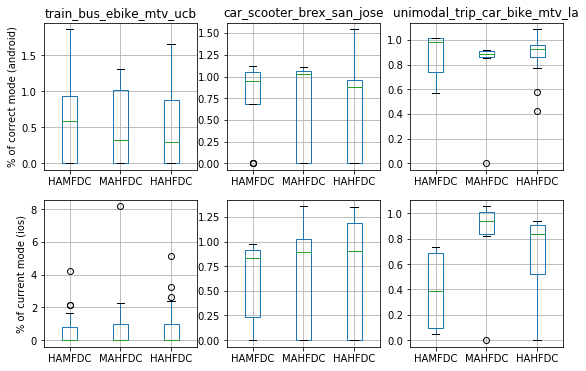

In [65]:
ifig, ax_array = plt.subplots(nrows=2,ncols=3,figsize=(9,6), sharex=False, sharey=False)
timeline_list = ["train_bus_ebike_mtv_ucb", "car_scooter_brex_san_jose", "unimodal_trip_car_bike_mtv_la"]
for i, tl in enumerate(timeline_list):
    print(len(tradeoff_df_filtered.query("timeline == @tl & phone_os == 'android'")))
    tradeoff_df_filtered.query("timeline == @tl & phone_os == 'android'").boxplot(ax = ax_array[0][i], column=["matching_pct"], by=["quality"])
    ax_array[0][i].set_title(tl)
    print(len(tradeoff_df_filtered.query("timeline == @tl & phone_os == 'ios'")))
    tradeoff_df_filtered.query("timeline == @tl & phone_os == 'ios'").boxplot(ax = ax_array[1][i], column=["matching_pct"], by=["quality"])
    ax_array[1][i].set_title("")
    # tradeoff_df.query("timeline == @tl & phone_os == 'ios'").boxplot(ax = ax_array[2][i], column=["visit_reports"], by=["quality"])
    # ax_array[2][i].set_title("")

    # print(android_ax_returned.shape, ios_ax_returned.shape)

for i, ax in enumerate(ax_array[0]):
    ax.set_xticklabels([q2r_map[int(t.get_text())] for t in ax.get_xticklabels()])
    ax.set_xlabel("")

for i, ax in enumerate(ax_array[1]):
    ax.set_xticklabels([q2r_map[int(t.get_text())] for t in ax.get_xticklabels()])
    ax.set_xlabel("")

# for ax in ax_array[1]:
#     ax.set_xticklabels(q2r_ios_list[1:])
#     ax.set_xlabel("")

# for ax in ax_array[2]:
#     ax.set_xticklabels(q2r_ios_list[1:])
#     ax.set_xlabel("")

ax_array[0][0].set_ylabel("% of correct mode (android)")
ax_array[1][0].set_ylabel("% of current mode (ios)")
# ax_array[2][0].set_ylabel("Difference in visit reports (ios)")
# ifig.suptitle("% of section that has the correct mode v/s configured quality over multiple timelines")
ifig.suptitle("")
# ifig.tight_layout()

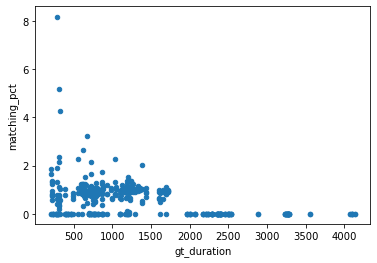

In [54]:
tradeoff_df_filtered.plot(x="gt_duration", y="matching_pct", kind='scatter')

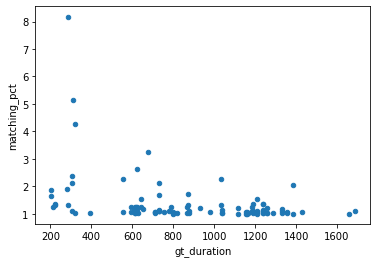

In [55]:
tradeoff_df_filtered.query("matching_pct > 1").plot(x="gt_duration", y="matching_pct", kind='scatter')

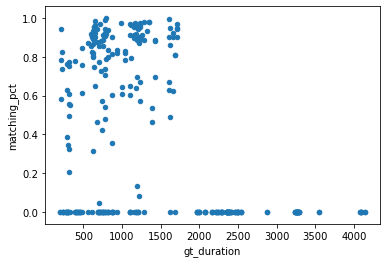

In [56]:
tradeoff_df_filtered.query("matching_pct <= 1").plot(x="gt_duration", y="matching_pct", kind='scatter')

3.0 0.7073098685566129 0.0 1.858059420819237
4.0 1.0963370667431886 0.0 8.180556206950609
5.0 1.031997939441392 0.0 5.161915556212191
6.0 0.22404705344355372 0.0 1.0136123489665128
7.0 0.0 0.0 0.0
8.0 0.5547287141957065 0.0 0.8468980690937982
9.0 1.032701296497613 0.0 2.2744173700584804
10.0 0.9936242512573236 0.0 2.63954332798317
11.0 0.5660226543301473 0.0 3.232922749166735
12.0 0.6523653313007202 0.0 2.127157726776554
13.0 0.7127371321418018 0.0 1.25700142122066
14.0 0.6303946952336623 0.0 1.7222861782534722
15.0 0.7142248393039206 0.0 1.1981326974693938
16.0 0.8229115422395412 0.6080170862822873 1.062825420292869
17.0 1.1499342863769177 0.7848721730971391 2.268825522760226
18.0 0.5916770523921231 0.0 1.1970885853332267
19.0 0.8174277912518256 0.0 1.3724567529540341
20.0 0.8516776982395209 0.0 1.5412904809472237
21.0 0.8844752466307693 0.0 1.2149109960572058
22.0 1.031100303308417 0.9326061256741618 1.1718686769518676
23.0 0.9445318052176556 0.46577558659671214 2.032305402694107
26.

<ErrorbarContainer object of 3 artists>

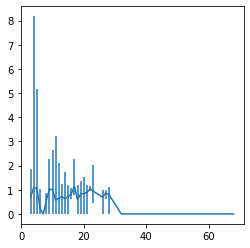

In [57]:
matching_pct_range_list = []
for k, df in tradeoff_df_filtered.groupby("gt_duration_mins"):
    print (k, df.matching_pct.mean(), df.matching_pct.min(), df.matching_pct.max())
    matching_pct_range_list.append({"gt_duration_mins": k, "mean": df.matching_pct.mean(), "min": df.matching_pct.min(), "max": df.matching_pct.max()})
matching_pct_range_df = pd.DataFrame(matching_pct_range_list)
ifig, ax = plt.subplots(1,1, figsize=(4,4), squeeze=True)
ax.errorbar(matching_pct_range_df.gt_duration_mins, y=matching_pct_range_df["mean"],  yerr = [matching_pct_range_df["mean"] - matching_pct_range_df["min"],
                                                                                              matching_pct_range_df["max"] - matching_pct_range_df["mean"]])

<ErrorbarContainer object of 3 artists>

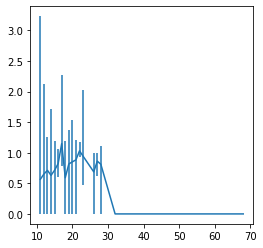

In [58]:
matching_pct_range_df_filtered = matching_pct_range_df.query('gt_duration_mins > 10')
ifig, ax = plt.subplots(1,1, figsize=(4,4), squeeze=True)
ax.errorbar(matching_pct_range_df_filtered.gt_duration_mins, y=matching_pct_range_df_filtered["mean"],  yerr = [matching_pct_range_df_filtered["mean"] - matching_pct_range_df_filtered["min"],
                                                                                              matching_pct_range_df_filtered["max"] - matching_pct_range_df_filtered["mean"]])

In [59]:
np.array(list(zip(np.repeat([1], 37), np.repeat([10], 37)))).shape

(37, 2)

In [60]:
tradeoff_df_filtered.sort_values(by="matching_pct", ascending=False)

battery_drain     duration  gt_base_mode  gt_duration     gt_mode  \
497      19.000000 46532.427479             1   286.872280     WALKING   
680      35.000002 42584.159111             1   309.817105     WALKING   
735      32.999998 42597.379254             1   321.221416     WALKING   
671      38.000000 44696.648613             1   676.477351     WALKING   
450      37.000000 46530.263775             1   624.730163     WALKING   
646      43.000001 43172.048678             1   303.087207     WALKING   
484      33.999997 44750.494011             1   553.934256     WALKING   
489      19.000000 46532.427479             1  1032.503362     WALKING   
697      42.000002 43111.695970             1   303.087207     WALKING   
717      44.999999 44652.658225             1   728.258866     WALKING   
531      19.000000 44847.878125             1  1384.793227     WALKING   
442      37.000000 46530.263775             1   282.958358     WALKING   
412      23.000000 44898.343000             1   201.157530     WALKING   
676      35.000002 42584.159111             1   869.892462     WALKING   
700      42.000002 43111.695970             1   728.378768     WALKING   
361      93.000000 44863.886000             1   201.157530     WALKING   
688      35.000002 42584.159111             1   643.608598     WALKING   
148      45.999996 24843.408000             2  1206.628131    ESCOOTER   
515      19.000000 44849.466496             2  1189.503218   BICYCLING   
476      33.999997 44750.494011             1   220.615500     WALKING   
308       0.999999 19803.716269             2  1239.644502    ESCOOTER   
260       6.999999 19805.042712             2  1239.644502    ESCOOTER   
438      37.000000 46530.263775             1  1032.503362     WALKING   
527      19.000000 44847.878125             1   220.615500     WALKING   
625      65.000000 42625.183000             1   869.892462     WALKING   
395      25.000000 46369.172000             1   286.872280     WALKING   
472      33.999997 44750.494011             1   790.205353     WALKING   
739      32.999998 42597.379254             1   643.608598     WALKING   
255       6.000000 20948.817884             1   611.002194     WALKING   
459      37.000000 44897.351051             1   213.986687     WALKING   
..             ...          ...           ...          ...         ...   
602      77.000000 43176.157000             3  2360.456266         BUS   
603      77.000000 43176.157000             1   775.570786     WALKING   
604      77.000000 43176.157000             4   815.451898  LIGHT_RAIL   
344      95.000000 46332.366000             1   286.872280     WALKING   
609      95.000000 44705.633000             4  2292.430620       TRAIN   
577      98.000000 42613.098000             4  3290.304318      SUBWAY   
375      80.000000 44852.983000             3   423.591118         BUS   
415      23.000000 44898.343000             3  2389.630034         BUS   
552      99.000000 43130.491000             1   775.570786     WALKING   
409      23.000000 44898.343000             3   459.011876         BUS   
541      99.000000 43130.491000             4  2215.111392       TRAIN   
543      99.000000 43130.491000             4  3250.569629      SUBWAY   
407      23.000000 44898.343000             4  3264.873161      SUBWAY   
545      99.000000 43130.491000             3   301.771900         BUS   
405      23.000000 44898.343000             4  2285.804685       TRAIN   
400      25.000000 46369.172000             4   719.915390  LIGHT_RAIL   
398      25.000000 46369.172000             3  2354.470380         BUS   
551      99.000000 43130.491000             3  2360.456266         BUS   
553      99.000000 43130.491000             4   815.451898  LIGHT_RAIL   
570      92.000000 44683.567000             4   864.186985  LIGHT_RAIL   
392      25.000000 46369.172000             3   398.240242         BUS   
558      92.000000 44683.567000             4  2292.430620       TRAIN   
560      

In [61]:
tradeoff_df.matching_pct.min(), tradeoff_df.matching_pct.max()

(0.0, 23.152539750387387)

In [62]:
out_of_battery_phones = tradeoff_df.query("timeline=='train_bus_ebike_mtv_ucb' & role=='HAHFDC' & trip_id=='berkeley_to_mtv_SF_express_bus_0' & phone_os == 'android'")
for i in out_of_battery_phones.index:
    tradeoff_df.loc[i,"end_diff_mins"] = float('nan')

### Anomaly checks

We can clearly see that there are several outliers with the start/end timestamps for the sections. Let us explore these in greater detail and see if we can find any patterns.

In [63]:
fmt = lambda ts: arrow.get(ts).to("America/Los_Angeles")


def check_outlier(eval_range, trip_idx, section_id, base_mode):
    eval_trip = eval_range["evaluation_trip_ranges"][trip_idx]
    eval_range["motion_activity_df"]["fmt_time"] = eval_range["motion_activity_df"].ts.apply(lambda ts: fmt(ts))
    eval_trip["motion_activity_df"]["fmt_time"] = eval_trip["motion_activity_df"].ts.apply(lambda ts: fmt(ts))
    eval_section = [s for s in eval_trip["evaluation_section_ranges"] if s["trip_id"] == section_id][0]
    print(fmt(eval_section["start_ts"]), "->", fmt(eval_section["end_ts"]))
    print([(fmt(ssr["start_ts"]), fmt(ssr["end_ts"]), ssr["mode"]) for ssr in eval_trip["sensed_section_ranges"]])
    matching_section_map = embs.find_matching_segments(eval_trip["evaluation_section_ranges"], "trip_id", eval_trip["sensed_section_ranges"])
    sensed_section_range = matching_section_map[section_id]["match"]
    print([(fmt(cm["start_ts"]), fmt(cm["end_ts"]), cm["mode"]) for cm in sensed_section_range])
    matching_sections = [s for s in sensed_section_range if s["mode"] == base_mode]
    print("For %s (%s -> %s) %s, matching_sections = %s" % 
        (eval_section["trip_id"], eval_section["start_ts"], eval_section["end_ts"], base_mode,
        matching_sections))
    matching_ts = sum([(s["end_ts"] - s["start_ts"]) for s in matching_sections])
    print("matching_ts = %s, ground_truth ts = %s" % (matching_ts, (eval_section["end_ts"] - eval_section["start_ts"])))
    matching_pct = matching_ts / (eval_section["end_ts"] - eval_section["start_ts"])
    print(matching_pct)
    print("section activity head")
    ipyd.display(eval_section["motion_activity_df"].head(n=3))
    print("section activity tail")
    ipyd.display(eval_section["motion_activity_df"].tail(n=3))
    section_end_ts = eval_section["end_ts"]
    print("post-section end activity head")
    ipyd.display(eval_range["motion_activity_df"].query("@section_end_ts <= ts <= @section_end_ts + 30 * 60").head())

In [ ]:
def check_outlier_expanded(eval_range, trip_idx, section_id, base_mode):
    eval_trip = eval_range["evaluation_trip_ranges"][trip_idx]
    eval_range["motion_activity_df"]["fmt_time"] = eval_range["motion_activity_df"].ts.apply(lambda ts: fmt(ts))
    eval_trip["motion_activity_df"]["fmt_time"] = eval_trip["motion_activity_df"].ts.apply(lambda ts: fmt(ts))
    eval_section = [s for s in eval_trip["evaluation_section_ranges"] if s["trip_id"] == section_id][0]
    print(fmt(eval_section["start_ts"]), "->", fmt(eval_section["end_ts"]))
    print([(fmt(ssr["data"]["start_ts"]), fmt(ssr["data"]["end_ts"]), ssr["data"]["mode"])
           for ssr in eval_trip["sensed_section_ranges"]])
    trip_ma_df = eval_trip["motion_activity_df"]
    # we may get some transitions after the trip ends 
    # let's expand the activity range to account for that
    trip_end_ts = eval_trip["end_ts"]
    extended_ma_df = eval_range["motion_activity_df"].query("@trip_end_ts <= ts <= @trip_end_ts + 30 * 60")
    ma_df = pd.concat([trip_ma_df, extended_ma_df],
            axis="index")

    curr_trip_section_transitions = embs.find_section_transitions(
        ma_df.query(embs.VALID_QUERIES_NO_STILL["android"]), embs.TRANSITION_FNS["android"])
    
    ipyd.display(curr_trip_section_transitions)
    
    last_section = eval_trip["evaluation_section_ranges"][-1]
    last_section_gt = pv_ucb.spec_details.get_ground_truth_for_leg(eval_trip["trip_id_base"], last_section["trip_id_base"])
    if last_section_gt["mode"] == "WALKING":
        # For trip that end in walking, we need to include still transitions as valid
        # otherwise, there is no end transition from walking to a valid mode
        if len(curr_trip_section_transitions) > 0:
            curr_last_transition_ts = curr_trip_section_transitions.iloc[-1].ts
        else:
            curr_last_transition_ts = 0
        print("Trip ending in walking found, checking for any final still transitions > %s" % curr_last_transition_ts)
        still_section_transitions = extended_ma_df.query("ts > @curr_last_transition_ts").query(embs.STILL_ENTRIES["android"])
        if len(still_section_transitions) > 0:
            curr_trip_section_transitions = curr_trip_section_transitions.append(still_section_transitions.iloc[0])
            
    ipyd.display(curr_trip_section_transitions)

    matching_section_map = embs.find_matching_segments(eval_trip["evaluation_section_ranges"], "trip_id", eval_trip["sensed_section_ranges"])
    sensed_section_range = matching_section_map[section_id]["match"]
    print([(fmt(cm["start_ts"]), fmt(cm["end_ts"]), cm["mode"]) for cm in sensed_section_range])
    matching_sections = [s for s in sensed_section_range if s["mode"] == base_mode]
    print("For %s (%s -> %s) %s, matching_sections = %s" % 
        (eval_section["trip_id"], eval_section["start_ts"], eval_section["end_ts"], base_mode,
        matching_sections))
    matching_ts = sum([(s["end_ts"] - s["start_ts"]) for s in matching_sections])
    print("matching_ts = %s, ground_truth ts = %s" % (matching_ts, (eval_section["end_ts"] - eval_section["start_ts"])))
    matching_pct = matching_ts / (eval_section["end_ts"] - eval_section["start_ts"])
    print(matching_pct)
    print("section activity head")
    ipyd.display(eval_section["motion_activity_df"].head(n=3))
    print("section activity tail")
    ipyd.display(eval_section["motion_activity_df"].tail(n=3))
    section_end_ts = eval_section["end_ts"]
    print("post-section end activity head")
    ipyd.display(eval_range["motion_activity_df"].query("@section_end_ts <= ts <= @section_end_ts + 30 * 60").head())

#### sections which have matching pct > 1

This is mainly caused by 

- most of the highest values are from `walk_start` and `walk_end`. This is because we end up matching them with sections that correspond to the entire trip and not just the transitions. For e.g. `walk_end` is from `19:20:31 -> 19:20:57` but it matches the section from `19:01:53 -> 19:27:21` because it is all WALKING.

- looking at longer sections, the first "real" section is `walk to the bikeshare location_0`. Again, it was from `16:37:07 -> 2019-07-24T16:41:54` but we matched the entire `WALKING` range of `16:38:36 -> 17:21:13`

In [ ]:
tradeoff_df.query("matching_pct > 0").sort_values(by="matching_pct")

In [ ]:
check_outlier(av_la.map()['ios']['ucb-sdb-ios-3']["evaluation_ranges"][0], 1, "walk_end_0", "WALKING")

In [ ]:
check_outlier(av_ucb.map()['ios']['ucb-sdb-ios-3']["evaluation_ranges"][0], 2, "walk to the bikeshare location_0", "WALKING")

#### sections which have 0 matching_pct

- suburb_city_driving_weekend_0: matches a walking trip, no motion activity until tracking actually stops. GT trip end for the `walk_start` section is `17:40:03`, first point in the motion activity df for the **range** is at `17:46:39`. The AUTOMOTIVE range GT end is `17:52:26`; the sensed range is from `18:33:45 -> 19:41:13`.
- similarly for `city_escooter`

   ```
   Ground truth = 16:18:07 -> 16:38:14
   (<Arrow [2019-07-22T16:11:09.955601-07:00]>, <Arrow [2019-07-22T16:59:30.826229-07:00]>, 'WALKING'
   (<Arrow [2019-07-22T16:59:30.826229-07:00]>, <Arrow [2019-07-22T17:01:30.321116-07:00]>, 'AUTOMOTIVE'
   (<Arrow [2019-07-22T17:01:30.321116-07:00]>, <Arrow [2019-07-22T17:02:54.217346-07:00]>, 'WALKING'
   (<Arrow [2019-07-22T17:02:54.217346-07:00]>, <Arrow [2019-07-22T17:34:33.386226-07:00]>, 'AUTOMOTIVE'
   (<Arrow [2019-07-22T17:34:33.386226-07:00]>, <Arrow [2019-07-22T17:46:59.568747-07:00]>, 'WALKING')
   ```

- for `commuter_rail_with_tunnels_0`

Phone ran out during this section. Need to exclude

- similarly for `inner_suburb_downtown_walk_0`

- for `suburb_city_driving_weekend_0`, classified as `CYCLING`


```

2019-07-27T17:40:03.318182-07:00 -> 2019-07-27T17:52:26.823849-07:00
[(<Arrow [2019-07-27T17:43:45.507000-07:00]>, <Arrow [2019-07-27T17:51:10.151000-07:00]>, 'CYCLING'
(<Arrow [2019-07-27T17:51:10.151000-07:00]>, <Arrow [2019-07-27T17:53:44.761000-07:00]>, 'AUTOMOTIVE')]
```

In [ ]:
tradeoff_df.query("matching_pct == 0").head()

In [ ]:
check_outlier(pv_la.map()['android']['ucb-sdb-android-3']["evaluation_ranges"][0], 0, "walk_start_0", "WALKING")

In [ ]:
tradeoff_df.query("matching_pct == 0 & section_id != 'walk_start_0' and section_id != 'walk_end_0' & ((section_id != 'commuter_rail_with_tunnels_0' & section_id != 'inner_suburb_downtown_walk_0') | phone_os != 'android')")

In [ ]:
check_outlier(pv_sj.map()['ios']['ucb-sdb-ios-3']["evaluation_ranges"][0], 1, "city_escooter_0", "CYCLING")

In [ ]:
check_outlier_expanded(pv_ucb.map()['android']['ucb-sdb-android-2']["evaluation_ranges"][0], 2, "commuter_rail_with_tunnels_0", "AUTOMOTIVE")

In [ ]:
check_outlier(pv_la.map()['android']['ucb-sdb-android-2']["evaluation_ranges"][0], 0, "suburb_city_driving_weekend_0", "AUTOMOTIVE")